In [0]:
import numpy as np
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.models import Model
from keras.layers import GlobalAveragePooling2D,MaxPooling2D
from keras.layers import Dense,Flatten,SpatialDropout2D
from keras.layers.merge import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import keras; print(keras.__version__)

2.1.3


In [2]:
!pip install keras==2.1.3
image_size = (64, 64)

     |████████████████████████████████| 327kB 7.5MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.3 which is incompatible.
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [0]:
def plot_model_history(history):
    """
    Function to plot training and validation data of model
    
    Parameters
    ----------
    history: dictionary
             history of training and validation of model
    Returns
    -------
    None
    
    """
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
def buildNet(num_classes):
    """
    Function to build 4 layer NN with 2 Conv layers, 1 MaxPool layer,
    1 GlobalMaxPool layer and 2 Dense layers
    
    Parameters
    ----------
    num_classes: int
                 Number of classes in training data
    Returns
    -------
    Neural Network created
    """
    model1=Sequential()
    model1.add(Convolution2D(32, (3,3),input_shape=(image_size[0], image_size[1], 3),activation='relu'))
    model1.add(MaxPooling2D(pool_size=(2,2)))
    model1.add(Convolution2D(64,(3,3),activation='relu'))
    model1.add(GlobalAveragePooling2D())

    model1.add(Dense(128, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model1.summary())
    return model1

In [0]:
def trainNet(training_set, validation_set):
    """
    Function to train Neural Network Created, save it as hd5 and plot the various parameters.
    
    Arguments
    ---------
    training_set:   ImageDataGenerator object
                    Training set with labels.
    validation_set: ImageDataGenerator object
                    Validation set with labels.
    
    Returns
    -------
    history: dictionary
             History of training and validation of model.
    """
    num_classes = 1#y_train.shape[1]
    model = buildNet(num_classes)
    history = History()
    callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),history]
    
    history = model.fit_generator(training_set,
                                steps_per_epoch = 8000/32,
                                epochs = 45,
                                validation_data = validation_set,
                                validation_steps = 64,
                                use_multiprocessing = True,
                                workers = 8)
    model.save('/content/drive/My Drive/Diabetic_Retinopathy_Detection/trained_newmodel.hd5')
    plot_model_history(history)

    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=100,callbacks=callbacks,verbose=1)
    return history

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Diabetic_Retinopathy_Detection/data1/train/',
                                                 target_size = image_size,
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory('/content/drive/My Drive/Diabetic_Retinopathy_Detection/data1/test/',
                                                  target_size = image_size,
                                                  batch_size = 32,
                                                  class_mode = 'binary', shuffle=False)

Found 838 images belonging to 2 classes.
Found 282 images belonging to 2 classes.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 27,841
Trainable params: 27,841
Non-trainable params: 0
_________________________________________________________________
None
E

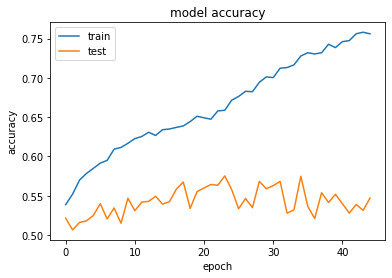

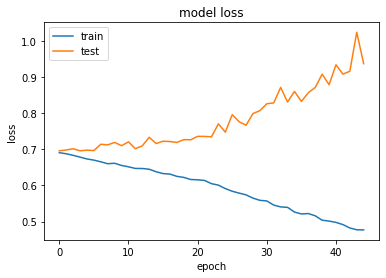

In [15]:
history = trainNet(training_set=training_set, validation_set=validation_set)